In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave, imread, imshow
import numpy as np
import os
import random
import tensorflow as tf
from matplotlib import pyplot as plt 

Using TensorFlow backend.


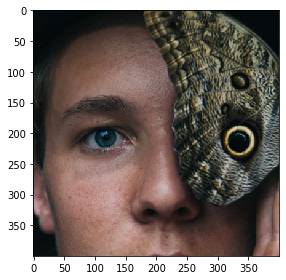

In [2]:
# Original input image
imshow('man.jpg')

In [3]:
# Get images
image = img_to_array(load_img('man.jpg'))
image = np.array(image, dtype=float)

In [ ]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]

In [4]:
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [5]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [6]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, None, 8)     80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 8)     584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, None, None, 32)   

In [7]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [10]:
history  = model.fit(x=X, y=Y, batch_size=1, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 332ms/step - loss: 4.3302e-04
Epoch 2/1000
1/1 [==============================] - 0s 334ms/step - loss: 4.3638e-04
Epoch 3/1000
1/1 [==============================] - 0s 344ms/step - loss: 4.2532e-04
Epoch 4/1000
1/1 [==============================] - 0s 359ms/step - loss: 4.4729e-04
Epoch 5/1000
1/1 [==============================] - 0s 338ms/step - loss: 3.7590e-04
Epoch 6/1000
1/1 [==============================] - 0s 339ms/step - loss: 3.9539e-04
Epoch 7/1000
1/1 [==============================] - 0s 346ms/step - loss: 4.4841e-04
Epoch 8/1000
1/1 [==============================] - 0s 339ms/step - loss: 4.3549e-04
Epoch 9/1000
1/1 [==============================] - 0s 347ms/step - loss: 4.4886e-04
Epoch 10/1000
1/1 [==============================] - 0s 353ms/step - loss: 4.0053e-04
Epoch 11/1000
1/1 [==============================] - 0s 347ms/step - loss: 3.8226e-04
Epoch 12/1000
1/1 [==============================] - 0s 336ms/s

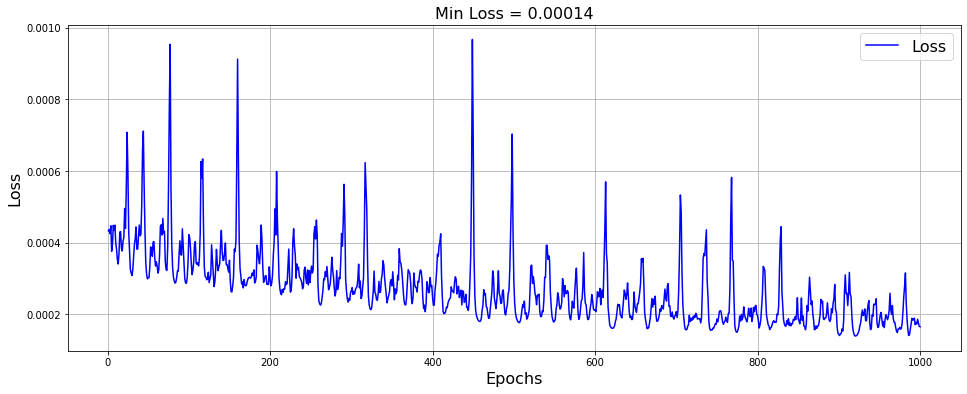

In [16]:
loss = history.history['loss']
nepochs=1000
plt.figure(figsize=(16,6))
plt.plot(range(1,nepochs+1), loss, 'b', label='Loss',color="blue")

plt.title('Min Loss = ' + str(round(min(loss),5)),fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.grid(True)
plt.legend(loc = 'upper right',fontsize=16)

plt.show()

In [ ]:
print(model.evaluate(X, Y, batch_size=1))

In [17]:
output = model.predict(X)
output *= 128

1/1 [==============================] - 0s 64ms/step
0.00016631708422210068


In [18]:
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]

### Intermediate represntation

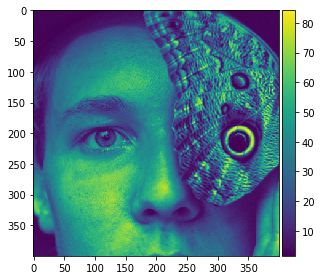

In [20]:
imshow(X[0][:,:,0])

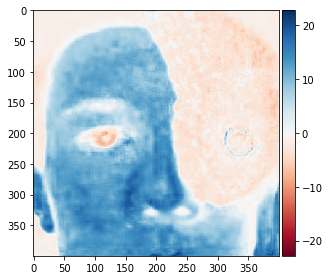

In [21]:
imshow(cur[:,:,1])

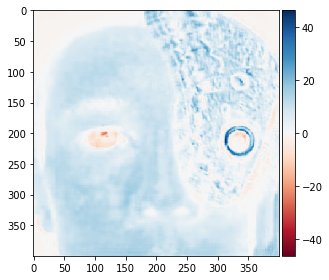

In [22]:
imshow(cur[:,:,2])

### Gray scale Image

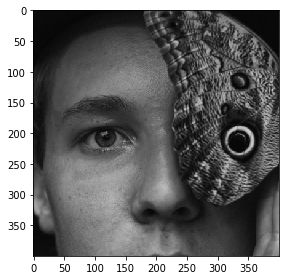

In [23]:
gray_image = rgb2gray(lab2rgb(cur)*255).astype(np.uint8)
imsave("img_gray_version.png", gray_image)
imshow(gray_image)

### Final output | Colored Image

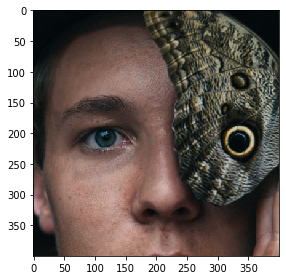

In [24]:
color_image = (lab2rgb(cur)*255).astype(np.uint8)
imsave("img_result.png", color_image)
imshow(color_image)